# Yahoo's Most Active Stocks

This notebook scrapes the data of yahoo's most active stock tickers, cleans the data, and provides a dataframe and visual representation of the price of each stock. 

First, lets import the neccessary libraries

In [48]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt

**SCRAPE SITE FUNCTION**

This function takes the url and html tag as parameters to returns the data the specific tag contains.

In [49]:
def scrape_site(url, tag_name):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  data = soup.find_all(tag_name)

  extracted_data = [item.text for item in data]
  return extracted_data


**CLEAN TABLE FUNCTION**

This function cleans the table to make the data more readable

In [50]:
def clean_table(raw_data):
  cleaned_data = []
  for table in raw_data:
    rows = table.split('/')
    for row in rows[1:]:
      values = row.split('\n')
      row_data = values
      cleaned_data.append(row_data)
    return cleaned_data

**SPLIT DATA COMPANY FUNCTION**

The strings needed further broken down because there was no delimeter between the change of every other company. So I identified a pattern as numbers followed by a capitol letter to indicate the change from the last index of the previous company's data. If the pattern is found in the sublist the string is splice on the index in both directions. 

In [51]:
def split_company_data(sublist):
  pattern = re.compile(r'(\d)([A-Z]{2,})')
# Find the index where the pattern matches, indicating a new company's data starts
  for i, item in enumerate(sublist):
    if pattern.search(item):
        return sublist[:i], sublist[i:]
  return sublist, []

**THE LISTS OF LISTS FUNCTION**

This function deciphers the list of lists. The first list of lists to be broken up is tesla and marathon, so thats how I modeled the function. This function invokes the split company data function to retrieve the split strings to be processed into a new list.

In [52]:
def process_list_of_lists(list_of_lists):
  processed_data = []
  for sublist in list_of_lists:
    tesla_data, marathon_data = split_company_data(sublist)
    processed_data.append((tesla_data, marathon_data))
  return processed_data

**SET URL, TAG, AND CALL FUNCTIONS**

Here we scrape and clean the data as best as we can.

In [53]:
url = 'https://finance.yahoo.com/most-active/'
tag_name = 'table'
raw_data = scrape_site(url, tag_name)
cleaned_data = clean_table(raw_data)


stocks = []
print(cleaned_data)

[['ATSLATesla, Inc.237.93-0.52-0.22%102.15M119.45M756.36B76.75MARAMarathon Digital Holdings, Inc.26.27+2.84+12.10%96.578M54.342M5.848BN'], ['AWBAWalgreens Boots Alliance, Inc.24.26-1.31-5.12%60.527M12.61M20.916BN'], ['AAAPLApple Inc.181.91-2.34-1.27%71.182M53.567M2.829T29.63AMDAdvanced Micro Devices, Inc.136.01+0.69+0.51%58.471M57.093M219.724B1,236.45DISHDISH Network Corporation5.77+0.11+1.94%50.816M9.99M3.083B3.04FFord Motor Company11.68-0.03-0.26%51.433M54.052M46.754B7.63INTCIntel Corporation46.87-0.18-0.38%47.766M38.763M197.604BN'], ['AAMZNAmazon.com, Inc.144.57-3.90-2.63%55.787M50.558M1.494T75.30MBLYMobileye Global Inc.29.97-9.75-24.55%42.977M2.164M24.16BN'], ['ALTHMLivent Corporation16.51-1.54-8.53%39.179M6.755M2.97B9.17PFEPfizer Inc.29.09-0.64-2.15%44.377M39.819M164.254B15.90PLTRPalantir Technologies Inc.16.25+0.16+0.99%39.77M61.405M35.36B232.14SOFISoFi Technologies, Inc.8.42+0.11+1.32%36.655M40.92M8.073BN'], ['ANIONIO Inc.8.27-0.23-2.71%37.491M51.308M17.201BN'], ['ABACBank of Am

**SPLIT UP ALL THE DATA IN DATASET**

Divide the string into seperate indicies on the period

In [54]:
for item in cleaned_data:
  for element in item:
    stock_info = element.split('.')
    stocks.append(stock_info)
    print(stock_info)

['ATSLATesla, Inc', '237', '93-0', '52-0', '22%102', '15M119', '45M756', '36B76', '75MARAMarathon Digital Holdings, Inc', '26', '27+2', '84+12', '10%96', '578M54', '342M5', '848BN']
['AWBAWalgreens Boots Alliance, Inc', '24', '26-1', '31-5', '12%60', '527M12', '61M20', '916BN']
['AAAPLApple Inc', '181', '91-2', '34-1', '27%71', '182M53', '567M2', '829T29', '63AMDAdvanced Micro Devices, Inc', '136', '01+0', '69+0', '51%58', '471M57', '093M219', '724B1,236', '45DISHDISH Network Corporation5', '77+0', '11+1', '94%50', '816M9', '99M3', '083B3', '04FFord Motor Company11', '68-0', '03-0', '26%51', '433M54', '052M46', '754B7', '63INTCIntel Corporation46', '87-0', '18-0', '38%47', '766M38', '763M197', '604BN']
['AAMZNAmazon', 'com, Inc', '144', '57-3', '90-2', '63%55', '787M50', '558M1', '494T75', '30MBLYMobileye Global Inc', '29', '97-9', '75-24', '55%42', '977M2', '164M24', '16BN']
['ALTHMLivent Corporation16', '51-1', '54-8', '53%39', '179M6', '755M2', '97B9', '17PFEPfizer Inc', '29', '09-0

**PROCESS INCORRECT STRINGS**

In [55]:
process_stocks = process_list_of_lists(stocks)

**CREATE EMPTY LISTS**

To append the data we are about to validate into the correct list

In [56]:

symbol_and_name = []
price = []
average_volume = []
market_cap = []

**VALIDATE DATASET**

Make sure the data sets we are entering have all indicies required. We cycle through each element in each sublist to make sure all data fields are required and not broken and append the data they contain into the correct list.

In [57]:
for item in process_stocks:
  for element in item:
    if len(element) >= 2:  # Adding a check for minimum length
      symbol_and_name.append(element[0])
      price.append(element[1])
      if len(element) >= 4:  # Checking for additional columns
        average_volume.append(element[-2])
        market_cap.append(element[-1])
print(f"Companies: {symbol_and_name}\nPrices: {price}\nAverage Volume: {average_volume}\nMarket Cap: {market_cap}")

Companies: ['ATSLATesla, Inc', '75MARAMarathon Digital Holdings, Inc', 'AWBAWalgreens Boots Alliance, Inc', 'AAAPLApple Inc', '63AMDAdvanced Micro Devices, Inc', 'AAMZNAmazon', '30MBLYMobileye Global Inc', 'ALTHMLivent Corporation16', '17PFEPfizer Inc', 'ANIONIO Inc', 'ABACBank of America Corporation33', '47CCLCarnival Corporation & plc16', 'AAALAmerican Airlines Group Inc', '48PTONPeloton Interactive, Inc', 'ATAT&T Inc', 'ALCIDLucid Group, Inc', 'ANVDANVIDIA Corporation479', '41PLUGPlug Power Inc', 'ARIVNRivian Automotive, Inc']
Prices: ['237', '26', '24', '181', '136', 'com, Inc', '29', '51-1', '29', '8', '80+0', '85+0', '13', '6', '17', '3', '98+4', '4', '19']
Average Volume: ['45M756', '342M5', '527M12', '567M2', '763M197', '558M1', '164M24', '755M2', '92M8', '491M51', '685M267', '348M22', '181M8', '735M2', '401M37', '269M33', '191M1', '86M2', '348M41']
Market Cap: ['36B76', '848BN', '61M20', '829T29', '604BN', '494T75', '16BN', '97B9', '073BN', '308M17', '484B9', '01BN', '555B5', 

**CONVERT PRICE STRING TO INTEGER**

Here we check to see if we can add the two integers together to get the price of the stock and return and integer. This integer will be used to help us make our dataframe and visualize our data.

In [58]:
def convert_to_int(s):
    try:
        if '+' in s:
            parts = s.split('+')
            return sum(int(part) for part in parts)
        elif '-' in s:
            parts = s.split('-')
            return int(parts[0]) - int(parts[1])
        else:
            return int(s)
    except ValueError:
        # Handle the case where the string can't be converted to an integer
        print(f"Warning: '{s}' could not be converted to an integer.")
        return None  # or some other default value or action

price_converted = [convert_to_int(i) for i in price]

**Display the data**

Here we create our dataframe of stock tickers and names, price, average volume over a three month period of time, and market cap.

In [59]:
df = pd.DataFrame({
  'Symbol and Name': symbol_and_name,
  'Price': price_converted,
  'Average Volume (3 months)': average_volume,
  'Market Cap': market_cap
})

print(df)

                         Symbol and Name  Price Average Volume (3 months)  \
0                        ATSLATesla, Inc  237.0                    45M756   
1   75MARAMarathon Digital Holdings, Inc   26.0                     342M5   
2      AWBAWalgreens Boots Alliance, Inc   24.0                    527M12   
3                         AAAPLApple Inc  181.0                     567M2   
4       63AMDAdvanced Micro Devices, Inc  136.0                   763M197   
5                            AAMZNAmazon    NaN                     558M1   
6              30MBLYMobileye Global Inc   29.0                    164M24   
7              ALTHMLivent Corporation16   50.0                     755M2   
8                        17PFEPfizer Inc   29.0                      92M8   
9                            ANIONIO Inc    8.0                    491M51   
10     ABACBank of America Corporation33   80.0                   685M267   
11     47CCLCarnival Corporation & plc16   85.0                    348M22   

**Sort the price list to be displayed**

In [60]:
df_sorted = df.sort_values(by='Price', ascending=False)

**Display the Price of the Most Active Stocks**

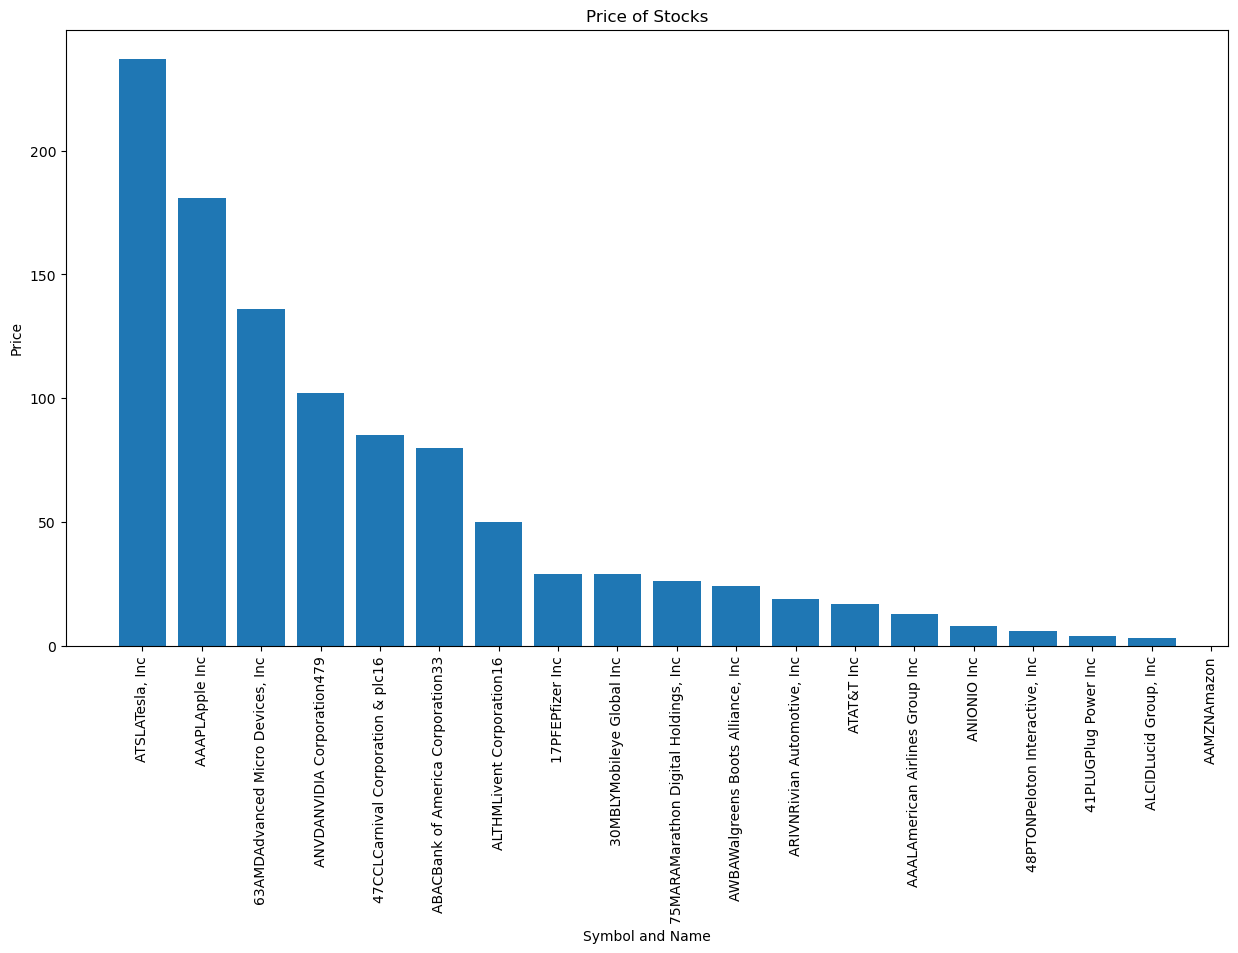

In [61]:
plt.figure(figsize=(15, 8))
plt.bar(df_sorted['Symbol and Name'], df_sorted['Price'])
plt.xlabel('Symbol and Name')
plt.ylabel('Price')
plt.title('Price of Stocks')
plt.xticks(rotation=90)
plt.show()